# Importing the Data

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
# Checking shape of samples 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


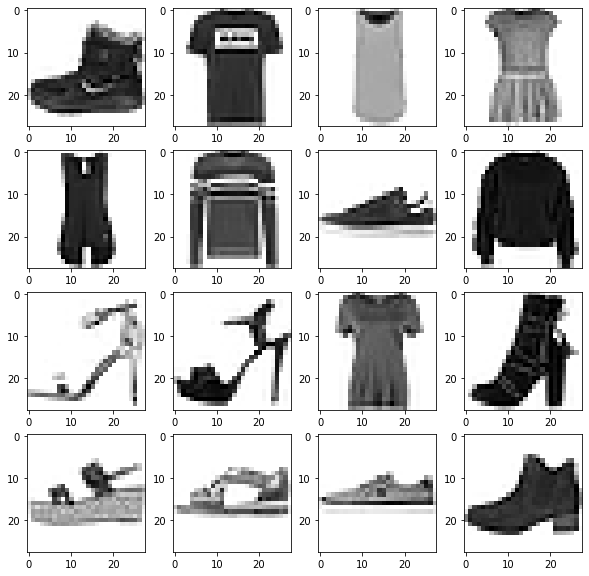

In [3]:
# Plotting a sample of data 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize= (10,10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap = 'binary')
plt.show()

# Processing the Data

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [5]:
# Converting data into matrix and normalizing data 
x_train = np.reshape(x_train, (60000, 28 * 28))
x_test = np.reshape(x_test, (10000, 28 * 28))

x_train = x_train / 255.
x_test = x_test / 255.

# Creating model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


nodes = 64

# Creating model
def create_model(weight_reg = False, dropout_reg = False):
    model = Sequential()
    if weight_reg:
        model.add(Dense(nodes, activation = 'relu',
                       input_shape = (784,), kernel_regularizer = l2(0.001)))
        model.add(Dense(nodes, activation = 'relu', kernel_regularizer = l2(0.001)))
    else:
        model.add(Dense(nodes, activation = 'relu', input_shape = (784,)))
        model.add(Dense(nodes, activation = 'relu'))
    if dropout_reg:
        model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['acc']
    )
    model.summary()
    return model

# Creating accuracy 

In [31]:
# Creaing accuracy report 
def show_acc(h, E):
    plt.plot(range(E), h.history['acc'], label = 'Training')
    plt.plot(range(E), h.history['val_acc'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.legend()
    plt.show()

In [32]:
from tensorflow.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(e, end = '.')
)

# training model
def run_experiment(E = 20, weight_reg = False, dropout_reg = False):
    m = create_model(weight_reg, dropout_reg)
    h = m.fit(
        x_train, y_train,
        epochs = E, verbose = False,
        validation_data = (x_test, y_test),
        callbacks = [simple_log]
    )
    show_acc(h, E)

# Results 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

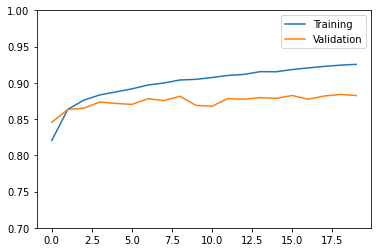

In [33]:
# Plotting model before dropout layer added
run_experiment()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

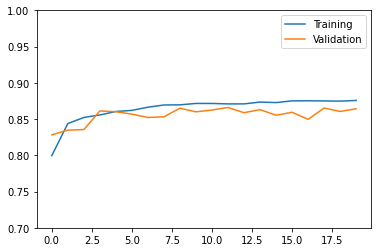

In [34]:
# Plotting model after dropout layer added
run_experiment(weight_reg = True, dropout_reg= True)